In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import style
#style.use('ggplot')
import os
import cv2
import csv
import sklearn
import pandas as pd
import sklearn.metrics as sm
from PIL import Image
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [2]:
%matplotlib inline

In [3]:
image = Image.open("D:/whitefly v2/012.jpg")
(imageWidth, imageHeight)=image.size
print(imageWidth, imageHeight)

222 227


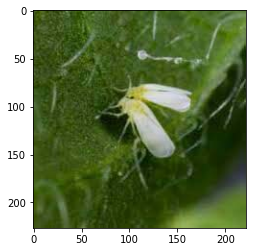

In [4]:
imgplot = plt.imshow(image)

In [5]:
n = 60

k = imageWidth/n
l = imageHeight/n

k = int(k)
l = int(l)

In [7]:
for i in range(0, l-1):
	for j in range(0, k-1):
		print(i," ",j," ",k," ",l," ",n)
		image_2 = image.crop((i*n, j*n, n*i+n, n*j+n))
		image_2.save("60_3_whitefly_row-"+str(i+1)+"-col-"+str(j+1)+".png")

0   0   4   3   60
0   1   4   3   60
0   2   4   3   60
1   0   4   3   60
1   1   4   3   60
1   2   4   3   60


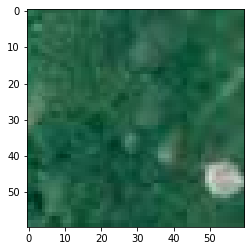

In [29]:
img = cv2.imread("D:/whitefly v2/60_3_whitefly_row-2-col-1.png")
imgplot = plt.imshow(img)

In [30]:
A=img/255
plt.figure(1)

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [31]:
ish=A.shape
X=np.zeros((ish[0]*ish[1],4),np.float32)
temp_1=np.zeros((ish[0],ish[1]),np.float32)
for i in range(0,ish[0],1):
    for j in range(0,ish[1],1):
        temp_1[i,j]=(i+j)/450

In [32]:
temp_1=np.reshape(temp_1,(ish[0]*ish[1]))        
A_new=np.reshape(A,(ish[0]*ish[1],ish[2]))

In [33]:
X[:,0:3]=A_new
X[:,3]=temp_1

In [34]:
X_1=np.float32(X)
criteria = (cv2.TERM_CRITERIA_MAX_ITER, 60, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS
ret,labels,centers = cv2.kmeans(X_1,3,None,criteria,60,flags)

In [35]:
for i in range(0,len(centers),1):
    err=centers[i,0:3]-[0,1,0]
    err=np.sum(np.multiply(err,err))
    if err<0.6:
        centers[i,:]=0

In [36]:
centers=np.uint8(centers*255)

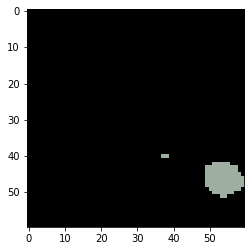

In [37]:
centers=centers[:,0:3]
res = centers[labels.flatten()]
res2 = np.reshape(res,(ish[0],ish[1],ish[2]))
plt.imshow(res2)

In [38]:
print(res2.shape)

(60, 60, 3)


In [39]:
res2

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [40]:
print(centers)

[[  0   0   0]
 [158 174 161]
 [  0   0   0]]


In [41]:
#filter rows of original data
A = res2[labels == 0]
B = res2[labels == 1]
C = res2[labels == 2]
 
#plotting the results
plt.title('KMeans Clustering on Pest Dataset with n_clusters = 3', loc='center', fontsize=12)
plt.scatter(A[:,0] , A[:,1], label = 'cluster 1')
plt.scatter(B[:,0] , B[:,1], c = 'r',label = 'cluster 2')
plt.scatter(C[:,0] , C[:,1], c = 'b',label = 'cluster 3')
plt.scatter(centers[:,0] , centers[:,1] , s = 50, color = 'k')
plt.xlabel('Colours'),plt.ylabel('Number of pixel')
#plt.legend()
#plt.xlim(0, 100)
#plt.ylim(0, 60)
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 60 but corresponding boolean dimension is 3600

In [9]:
all_data = pd.read_csv('D:/whitefly v2/60_3_whitefly.csv')

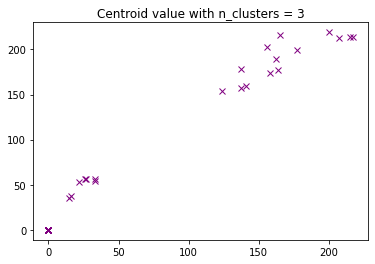

In [10]:
plt.title('Centroid value with n_clusters = 3', loc='center', fontsize=12)
plt.plot(all_data["X"], all_data["Y"], "x", color = 'purple')

In [11]:
km = KMeans(n_clusters = 3)
clusters=km.fit_predict(all_data)

In [12]:
km.labels_

array([0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1])

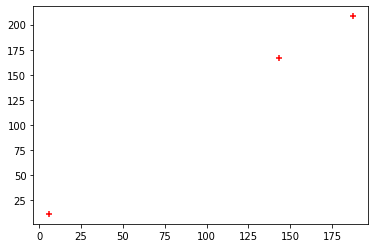

In [18]:
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='red', marker='+', label='centroid')